In [74]:
#import keras for building a simple regression model
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd




In [51]:
#load data from csv fiile into a numpy array using pandas and skipping the header row
data = pd.read_csv('Calcium_Classified.csv').values


In [52]:
#convert date time string '01/01/2020 07:54:00' to day of year 1-365
date_time_str = data[0,0]
date_time_obj = datetime.datetime.strptime(date_time_str, '%d/%m/%Y %H:%M:%S')
day_of_year = date_time_obj.timetuple().tm_yday
print(day_of_year)

1


In [84]:
#add a column to data frame with day of year
data = np.insert(data, 5, values=0, axis=1)
data = np.insert(data, 6, values=0, axis=1)
data = np.insert(data, 7, values=0, axis=1)
for i in range(data.shape[0]):
    date_time_str = data[i,0]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%m/%d/%Y %H:%M:%S')
    day_of_year = date_time_obj.timetuple().tm_yday
    year = date_time_obj.timetuple().tm_year
    secound_of_day = date_time_obj.timetuple().tm_hour*3600 + date_time_obj.timetuple().tm_min*60 + date_time_obj.timetuple().tm_sec
    data[i,5] = day_of_year
    data[i,6] = year
    data[i,7] = secound_of_day

In [85]:
#create a dataframe with the colums at index 1 and 5 of dataframe data
df = data[:,[1, 5, 6,7]]

In [86]:
df_pd = pd.DataFrame(df)

In [87]:
all_values = df_pd.values

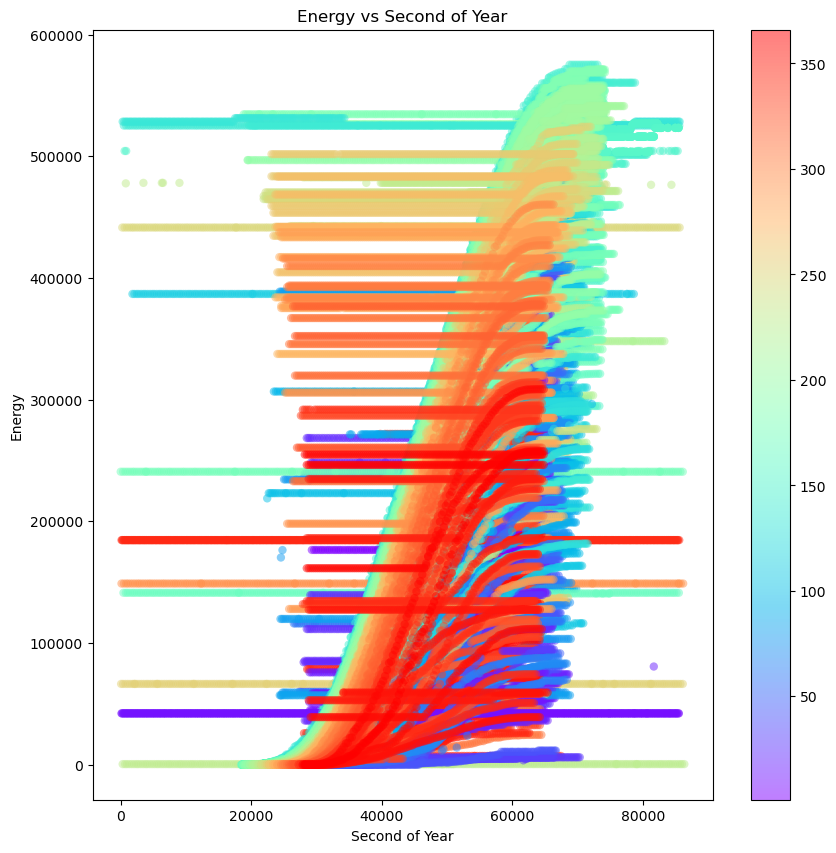

In [95]:
energy = all_values[:,0].astype('float32')
day = all_values[:,1]
year = all_values[:,2]
second = all_values[:,3]

#plot energy against second of year and hue by day and add labels for each year
plt.figure(figsize=(10,10))
plt.scatter(second, energy, c=day, cmap='rainbow', alpha=0.5, edgecolors='none')
plt.colorbar()
plt.xlabel('Second of Year')
plt.ylabel('Energy')
plt.title('Energy vs Second of Year')
plt.show()

In [96]:
x = all_values[:,1:4].astype('float32')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, energy, test_size=0.8, random_state=42,shuffle=True)

In [101]:
#build a model
model = Sequential()
model.add(Dense( 512,input_dim=3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(1,activation='relu'))
model.summary()
#compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
#train the model
model.fit(X_train,y_train, epochs=50)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 512)               2048      
                                                                 
 dropout_49 (Dropout)        (None, 512)               0         
                                                                 
 dense_70 (Dense)            (None, 256)               131328    
                                                                 
 dropout_50 (Dropout)        (None, 256)               0         
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 64)              

In [106]:
#predict
y_pred = model.predict(X_test)

5160/5160 [==============================] - 4s 762us/step


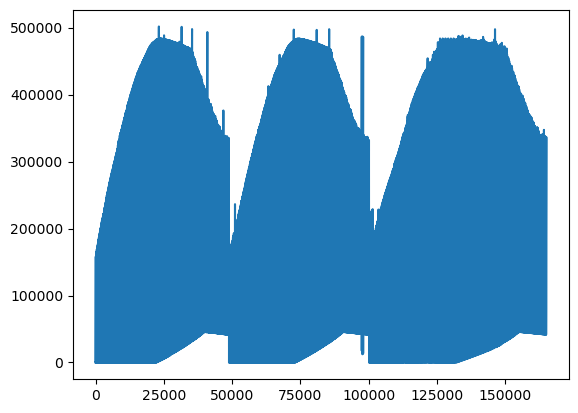

In [107]:
plt.plot(y_pred)
plt.show()

In [ ]:
plt.plot(y_test)
plt.show()

ValueError: x and y must be the same size

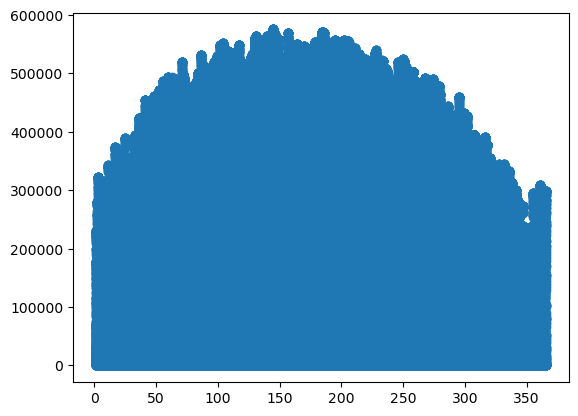

In [104]:

#plot the results
plt.scatter(day, energy)
plt.scatter(day, y_pred, color='red')
plt.show()

In [ ]:
#now to plot the energy values from the csv file against the day and time